# Ejercicio 5.1 : Calculando impedancia Zw

In [1]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parámetros  

#Parámetros(20 grados celsius)

c0=344 #Velocidad del sonido
rho=1.18 #Densidad
Z0=rho*c0 #Impedancia caraterística
n= 18.13*10**(-6) #Pa*s

#Datos ejercicio

resistividad=30000 #resistividad
dp=0.05 #espesor del material poroso 
da=0.05 #espesor cavidad de aire
lc=dp+da 
q=dp/lc
lh=0.003  #espesor placa
rh=0.0015 #radio perforaciones
phi=0.08 #porosidad 


In [3]:
#frecuencias
frec=  np.linspace(100,4000,100)

In [4]:
# Paso1: Calcular X:

#X=rho0*f/resistividad 

#Para armar arreglo 
arrayf=[]
arrayX=[]


#Calculando X

for i in (frec):
    x=rho*i/resistividad
    if 0.01 < x < 1:      #condición del modelo 
        arrayf.append(i) #frecuencias que cumplen condición 
        arrayX.append(x)
       
arrayf=np.array(arrayf) #formato numpy array
arrayX=np.array(arrayX)

#Calculando w
arrayw=2*np.pi*arrayf

#print (arrayX) 
print (arrayf) 
#print (arrayw) 

[ 257.57575758  296.96969697  336.36363636  375.75757576  415.15151515
  454.54545455  493.93939394  533.33333333  572.72727273  612.12121212
  651.51515152  690.90909091  730.3030303   769.6969697   809.09090909
  848.48484848  887.87878788  927.27272727  966.66666667 1006.06060606
 1045.45454545 1084.84848485 1124.24242424 1163.63636364 1203.03030303
 1242.42424242 1281.81818182 1321.21212121 1360.60606061 1400.
 1439.39393939 1478.78787879 1518.18181818 1557.57575758 1596.96969697
 1636.36363636 1675.75757576 1715.15151515 1754.54545455 1793.93939394
 1833.33333333 1872.72727273 1912.12121212 1951.51515152 1990.90909091
 2030.3030303  2069.6969697  2109.09090909 2148.48484848 2187.87878788
 2227.27272727 2266.66666667 2306.06060606 2345.45454545 2384.84848485
 2424.24242424 2463.63636364 2503.03030303 2542.42424242 2581.81818182
 2621.21212121 2660.60606061 2700.         2739.39393939 2778.78787879
 2818.18181818 2857.57575758 2896.96969697 2936.36363636 2975.75757576
 3015.15151515

In [5]:
#Paso2: Calcular Zc
    
#Zc=(1+a1*X**a2+ja3*X**a4)*Z0 #saqué los valores de los "a" de la tabla
#Z0=rho*c0

#Parámetros del modelo DandB
a1=0.0571
a2=(-0.754)
a3=(-0.087 )
a4=(-0.732)

#Para armar arreglo
arrayZc=[]


for i in (arrayX):
        Zc=Z0*(1+a1*(i**a2)+(1.j*a3*(i**a4)))
        arrayZc.append(Zc)

arrayZc=np.array(arrayZc) 
#print(arrayZc)

In [6]:
#Paso2: Calcular kc
    
#kc=(1+b1*X**b2+jb3*X**b4)*k0 #saqué los valores de los "b" de una tabla
#k0=2*pi*f/C0

#Parámetros del modelo
b1=0.0978
b2=-0.7 
b3=-0.189
b4=-0.595

#Para armar arreglo
arraykc=[]
arrayk0=[]


for i in range (len(arrayf)):
    k0=2*np.pi*arrayf[i]/c0
    arrayk0.append(k0)
    
for j in range (len(arrayX)):
    kc=arrayk0[j]*(1+b1*(arrayX[j]**b2)+(1.j*b3*(arrayX[j]**b4)))          
    arraykc.append(kc)

arrayk0=np.array(arrayk0) 
arraykc=np.array(arraykc) 

#print(arraykc)

In [7]:
#Paso3: calcular Zwm

#Zwm=-jZc*cot(kc*lc*q)

arrayZwm=-1.j*arrayZc*(np.tan(arraykc*lc*q))**(-1) 

arrayZwm=np.array(arrayZwm)
#print(arrayZwm)

In [8]:
#Paso4: Zwe

#Zwe=-jZ0*cot(k0*lc(1-q))

arrayZwe=-1.j*Z0*(1/np.tan((arrayk0*lc*(1-q)))) #bien

arrayZwe=np.array(arrayZwe)
#print(arrayZwe)

In [9]:
#Paso5: Zwem

#Zwem=(Zwm*Zwe+Z0**2)/Zwm+Zwe

arrayZwem=((arrayZwm*arrayZwe)+(Z0**2))/(arrayZwm+arrayZwe)

#arrayZwem=np.array(arrayZwem)   

In [10]:
#Paso6: Zw

#Zw=Ra+jwma+Zwem

#x=rh*(raiz(rho*w/n))
x=np.sqrt((rho*arrayw)/n)*rh

#Ra=(8*n)/(phi*rh**2)*(raiz(1+(x**2/32))+raiz(1/8)*(rh/lh)*x)*lh
ra1=np.sqrt(1+((x**2)/32))
ra2=np.sqrt(1/8)*x*(rh/lh)

Ra=(8*n*lh)/(phi*(rh**2))*(ra1+ra2)

#jma=(lh/phi)*(1+(1/raiz(9+(x**2/2)))+1.7*(rh/lh))*rho
ma1=(1/(np.sqrt(9+((x**2)/2))))
ma2=1.7*(rh/lh)

ma=((lh*rho)/phi)*(1+ma1+ma2)
arrayjwma=1.j*arrayw*ma

#Calculando Zw

arrayZw=Ra+arrayjwma+arrayZwem

arrayZw=np.array(arrayZw)

#print(arrayZw)

# Gráfica Zw

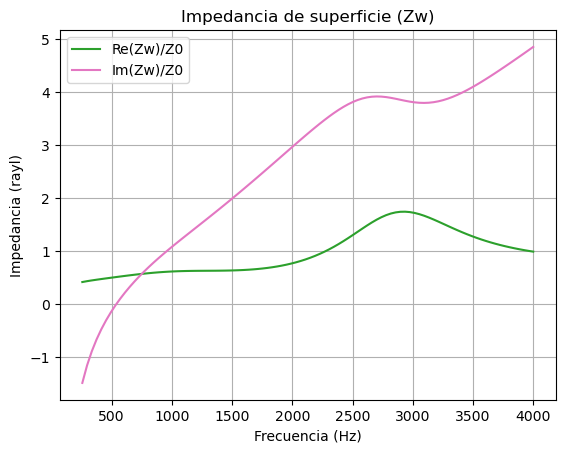

In [16]:

plt.plot(arrayf, np.real(arrayZw)/Z0, 'tab:green', label="Re(Zw)/Z0")
plt.plot(arrayf, np.imag(arrayZw)/Z0, 'tab:pink', label="Im(Zw)/Z0")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Impedancia (rayl)')
plt.title('Impedancia de superficie (Zw)')
plt.grid()
plt.legend()
plt.savefig('Zw.png')

# Calculando coeficiente de reflexion 

In [12]:
#Paso1: Calcular R(w)

#R(w)=(Zw-Z0)/(Zw+Z0)
Rw=(arrayZw-Z0)/(arrayZw+Z0)

#print(Rw)

### Gráfica R

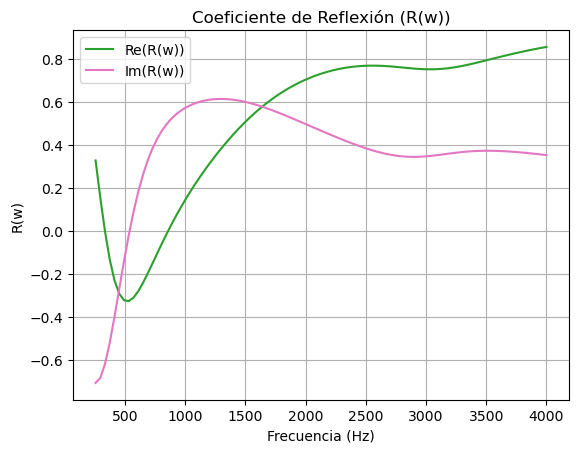

In [13]:

plt.plot(arrayf, np.real(Rw), 'tab:green', label="Re(R(w))")
plt.plot(arrayf, np.imag(Rw), 'tab:pink', label="Im(R(w))")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('R(w)')
plt.title('Coeficiente de Reflexión (R(w))')
plt.grid()
plt.legend()
plt.savefig('Rw.png')

# Calculando coeficiente de absorción

In [14]:
#Paso1: Calcular a(w)

#a(w)=1-abs(R(w))**2

aw=1-(np.abs(Rw))**2
    
print(aw)

[0.39520848 0.51099747 0.62014288 0.71482202 0.7900107  0.8439618
 0.87771314 0.89406797 0.89655453 0.88866342 0.87342543 0.85325776
 0.82997341 0.80486756 0.77882681 0.75243346 0.72605351 0.69990616
 0.67411631 0.64875281 0.62385536 0.59945262 0.57557341 0.55225265
 0.52953357 0.50746707 0.48610942 0.46551904 0.44575305 0.4268641
 0.40889774 0.3918907  0.37586986 0.36085201 0.34684434 0.33384527
 0.32184569 0.31083034 0.30077926 0.29166918 0.28347477 0.27616981
 0.26972813 0.26412433 0.25933441 0.25533614 0.25210925 0.24963549
 0.24789844 0.24688321 0.24657586 0.24696262 0.24802886 0.24975779
 0.25212881 0.25511557 0.25868369 0.26278819 0.26737075 0.27235686
 0.27765328 0.28314599 0.2886992  0.29415596 0.29934076 0.30406471
 0.30813336 0.31135699 0.3135625  0.31460591 0.31438356 0.31284066
 0.30997555 0.30583919 0.30052972 0.29418327 0.28696226 0.27904295
 0.2706038  0.2618157  0.25283466 0.2437972  0.23481807 0.22598999
 0.21738476 0.20905529 0.20103811 0.19335609 0.18602099 0.179035

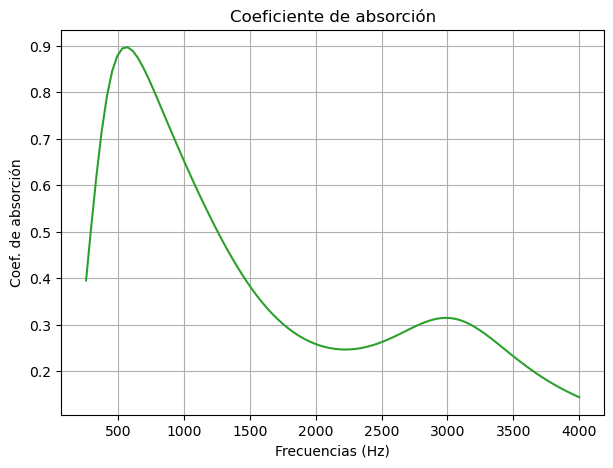

In [15]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(arrayf,aw,'tab:green')
ax.set_xlabel('Frecuencias (Hz)')
ax.set_ylabel('Coef. de absorción')
ax.grid() #grilla
ax.set_title('Coeficiente de absorción')
plt.savefig('aw.png')